## Introduction to Prophet Model
* Prophet is an open source software released by Facebooks core Data Science Team.
* It is available for download on CRAN and PyPi
* Prophet is a forecasting producer implemented in R and pyhton
* It is fast and provides completely automated forcast that can be tuned by hand by data scientists and analysts.
## Prophet Model
* Prophet is a producer used for forcasting time series data based on an additive model where non-linear trends are fit with yearly,weekly and daily seasonality plus holiday effects
* It provides us with the ability to make time series predections with good accuracy using simple intuitive parameters
### Missing Data Shifts in the Trend and Handle Outliers

# Advantages of Prophet Model
* Prophet is used in many applications across Facebook for producing reliable foercast for planning and goal setting
* Prophet is robust to outliers, missing data and dramatic changes in our time series
* It provides many possibilities for users to tweak and adjust forecsts

# Components of Prophet Model
### Seasonality
* The Seasonality s(T) provides an adaptability to the model by allowing periodic changes based on sub-daily,weakly and yearly seasonality
* To fit and forcast the effects of sesonality prophet relies on fourier series to provide a flexible model
* P is the period
* The fourier order N that defines whether high frequancy changes are allowed to be modelled is an important parameters to set here.
## Fourier Series
* A fourier series is a period function composed of harmonically related sines and combined by a weighted summation
* The fourier series has many applications such as:
* 1. Electrical engineering
* 2. Vibration analysis
* 3. Optics
* 4. Signal Processing
* 5. Image Processing
* 6. Econometrics
* The fourier series of function in the diffrential equation often gives some prediction about the behaviour of the solution of the diffrential equation

In [10]:
!pip install pystan

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\user\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-e0hr1xf0\\fbprophet_da1ed604ea774e24af0be4e26e903a87\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-e0hr1xf0\\fbprophet_da1ed604ea774e24af0be4e26e903a87\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\user\AppData\Local\Temp\pip-wheel-sw7dll43'
       cwd: C:\Users\user\AppData\Local\Temp\pip-install-e0hr1xf0\fbprophet_da1ed604ea774e24af0be4e26e903a87\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\l

In [12]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [13]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

data.shape

(144, 1)

In [14]:
# head of the data
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


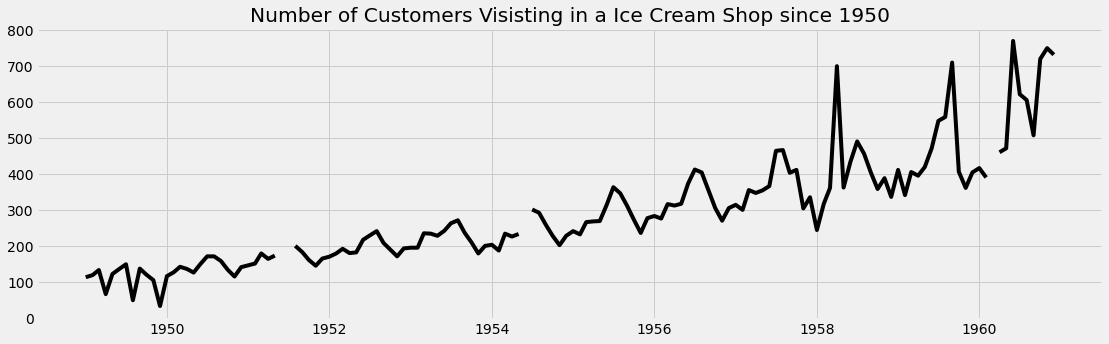

In [15]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

In [16]:
# splitting the training and testing data
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [17]:
# checking the shape of the training data
train.shape

(115, 1)

In [ ]:
from fbprophet import Prophet
# initialisaing prophet model
model = Prophet()

In [ ]:
# fitting the model with the training set
model.fit(train.reset_index().rename(columns = {'Date':'ds','Customers':'y'}))

In [ ]:
# making predictions on testing data
prediction = model.predict(test.reset_index().rename(columns = {'Date':'ds'}))

In [ ]:
prediction.head()

In [ ]:
# prediction plot
model.plot(prediction)

In [ ]:
# plotting the components of the model
model.plot_components(prediction)

In [ ]:
# cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '365 days')
df_cv.head()

In [ ]:
# performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()